In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [145]:
df = pd.read_excel("Data_Train.xlsx")

In [146]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [147]:
df.shape

(10683, 11)

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### Training Data - Data Preprocessing

In [149]:
df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
31h 30m      1
27h 30m      1
32h 20m      1
35h 20m      1
29h 10m      1
Name: Duration, Length: 368, dtype: int64

In [150]:
# Dropping Null values

df.dropna(inplace=True)

In [151]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

##### Extracting month and day of the jounery from the Date_of_Journey (string) using
1. to_datetime - dt.month
2. to_datetime - dt.day

In [152]:
df['Date_of_Journey'].head()

0    24/03/2019
1     1/05/2019
2     9/06/2019
3    12/05/2019
4    01/03/2019
Name: Date_of_Journey, dtype: object

In [153]:
df['Journey_day'] = pd.to_datetime(df['Date_of_Journey'], format = "%d/%m/%Y").dt.day

In [154]:
df['Journey_month'] = pd.to_datetime(df['Date_of_Journey'], format = "%d/%m/%Y").dt.month

In [155]:
# Date_of_Journey is now converted into integer columns, it can thus be dropped now

df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [156]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


###### Extracting hour and minute of departure from Dep_Time column using
1. to_datetime - dt.hour
2. to_datetime - dt.minute

In [157]:
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour

In [158]:
df['Dep_minute'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [159]:
df.drop(['Dep_Time'], axis = 1, inplace = True)

In [160]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


###### Extracting hour and minute of arrival  from column Arrival_Time ,  as done before

In [161]:
df['Arrival_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour

In [162]:
df['Arrival_minute'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [163]:
df.drop(['Arrival_Time'], axis = 1, inplace = True)

In [164]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


###### Extracting hours and minutes from Duration

In [165]:
# splitting the hours and minutes of the values given as "Xh Xm" in column Duration

#converting Duration into a list
duration = list(df['Duration']) 

# Checking if duration contains only hours or only minutes and respectively adding 0 minutes or 0 hours
for i in range(len(duration)):
    if (len(duration[i].split()) != 2):
        if "h" in duration[i]:
            duration[i] = duration[i] + " 0m" 
        else:
            duration[i] = "0h " + duration[i]
    
dur_hours = []
dur_min = []


for i in range(len(duration)):
    duration[i].split
    dur_hours.append(int(duration[i].split(sep = "h")[0]))
    dur_min.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [166]:
df['Duration_hour'] = dur_hours
df['Duration_minute'] = dur_min

In [167]:
df.drop(['Duration'], axis = 1, inplace = True)

In [168]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


#### "One Hot Encoding"- used for nominal data, ie data that is not ranked in any order for the following columns
1. Airlines
2. Source
3. Destination

###### Airlines

In [169]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

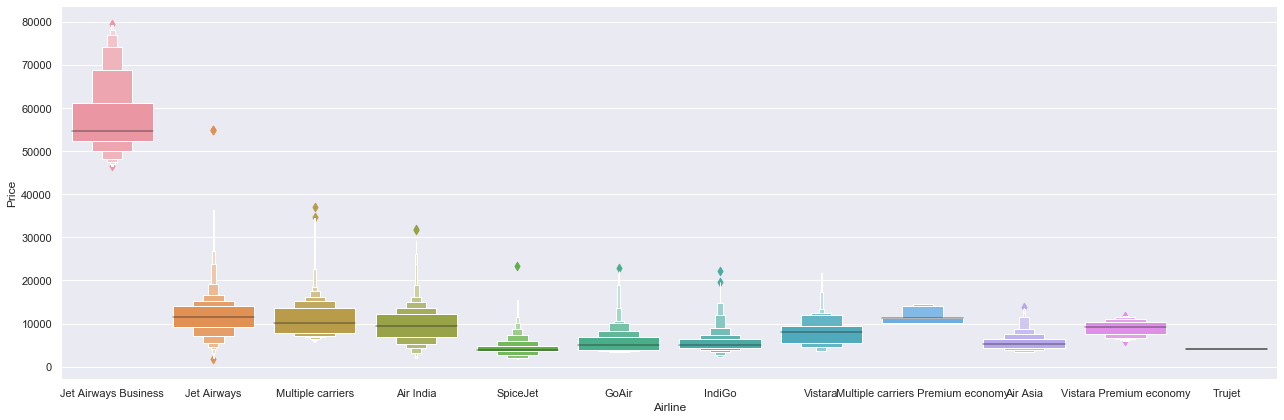

In [170]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

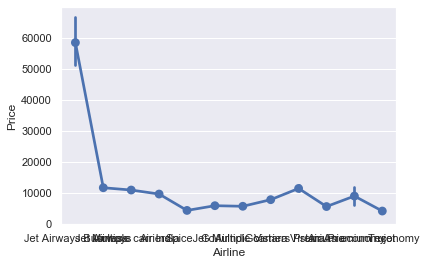

In [171]:
sns.pointplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), height = 6, aspect = 3)
plt.show()

In [172]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = df[["Airline"]]

In [173]:
Airline = pd.get_dummies(Airline, drop_first= True)

In [174]:
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [175]:
Airline.shape

(10682, 11)

###### Source


In [176]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

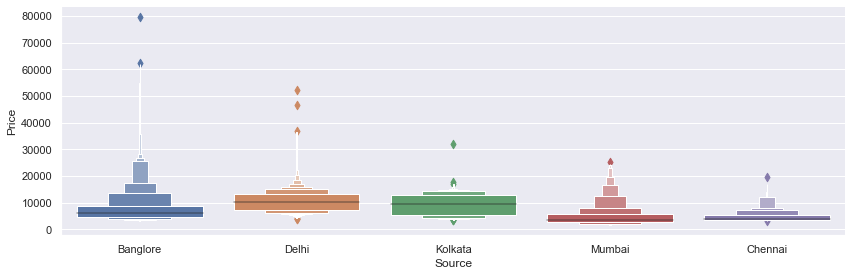

In [182]:
# Source vs Price

sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [ ]:
# can also use boxplot

In [183]:
Source = df[["Source"]]

In [184]:
Source = pd.get_dummies(Source, drop_first= True)

In [185]:
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


###### Destinanion

In [186]:
df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [187]:
Destination = df[["Destination"]]

In [188]:
Destination = pd.get_dummies(Destination, drop_first = True)

In [189]:
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [190]:
df[['Route', 'Total_Stops', 'Additional_Info']]

,Route,Total_Stops,Additional_Info
0,BLR → DEL,non-stop,No info
1,CCU → IXR → BBI → BLR,2 stops,No info
2,DEL → LKO → BOM → COK,2 stops,No info
3,CCU → NAG → BLR,1 stop,No info
4,BLR → NAG → DEL,1 stop,No info
...,...,...,...
10678,CCU → BLR,non-stop,No info
10679,CCU → BLR,non-stop,No info
10680,BLR → DEL,non-stop,No info
10681,BLR → DEL,non-stop,No info


In [191]:
# Removing additional info 
# Removing Route as it is re;lated to number of stops

df.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

In [192]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


#### "Label Encoding" used for ordered data. Total stops ordered based on the observation that increasing the number of stops increases the price

###### Total_stops

In [193]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [194]:
df['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [195]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


##### Combining/ Concatenating the training data with the encoded Airlines, Source and Destination

In [196]:
train_data = pd.concat([df, Airline, Source, Destination], axis = 1)

In [197]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [198]:
# Getting rid of the columns- Airlines, Source and Destination

train_data.drop(['Airline','Source','Destination'], axis = 1, inplace = True )

In [199]:
train_data

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,4107,9,4,19,55,22,25,2,30,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10679,0,4145,27,4,20,45,23,20,2,35,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10680,0,7229,27,4,8,20,11,20,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10681,0,12648,1,3,11,30,14,10,2,40,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


### Test Set - Preprocessing

In [200]:
df2 = pd.read_excel("Test_set.xlsx")

In [201]:
df2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [205]:
'''
Performing same preprocessing steps as in the training set, to the test set

1. date time
2. dependent features - one hot and lebel enc
3. getting rid of redunatant
4. concat

for i in range(len(duration)):
    duration[i].split
    dur_hours.append(int(duration[i].split(sep = "h")[0]))
    dur_min.append(int(duration[i].split(sep = "m")[0].split()[-1]))
'''

In [213]:
# Extracting Journey day and month

df2['Journey_day'] = pd.to_datetime(df2['Date_of_Journey'], format = "%d/%m/%Y").dt.day
df2['Journey_month'] = pd.to_datetime(df2['Date_of_Journey'], format = "%d/%m/%Y").dt.month


# Extracting departure hours and minutes 
    
df2['Dep_hour'] = pd.to_datetime(df2['Dep_Time']).dt.hour
df2['Dep_minute'] = pd.to_datetime(df2['Dep_Time']).dt.minute


# Extracting arrival hours and minutes 

df2['Arrival_hour'] = pd.to_datetime(df2['Arrival_Time']).dt.hour
df2['Arrival_minute'] = pd.to_datetime(df2['Arrival_Time']).dt.minute


# Extracting duration hours and minutes

duration2 = list(df2['Duration']) 

for i in range(len(duration2)):
    if(len(duration2[i].split()) != 2):
        if("h" in duration2[i]):
            duration2[i] = duration2[i] + " 0m"
        else:
            duration2[i] = "0h " + duration2[i]

dur_hr = []
dur_mn = []

for i in range(len(duration2)):
    dur_hr.append(int(duration2[i].split(sep = "h")[0]))
    dur_mn.append(int(duration2[i].split(sep = "m")[0].split()[-1]))
    
df2["Duration_hour"] = dur_hr
df2["Duration_minute"] = dur_mn


# One hot encoding on Airline, Source and Destination 

Airline2 = pd.get_dummies(df2['Airline'], drop_first = True)

Source2 = pd.get_dummies(df2['Source'], drop_first= True)

Destination2 = pd.get_dummies(df2['Destination'], drop_first= True)


# Labelling number of stops

df2['Total_Stops'].replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


df2.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,6,6,17,30,4,25,10,55
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,12,5,6,20,10,20,4,0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,21,5,8,0,21,0,13,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,24,6,23,55,2,45,2,50


In [ ]:
# Concatenating Airlines2, Source2, Destination2 wwith Test Data

test_data = pd.concat([df2, Airline2, Source2, Destination2], axis = 1)


# Dropping unrequired columns

test_data.drop(['Route', 'Additional_Info', 'Airline', 'Source', 'Destination', 'Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration'], axis = 1, inplace = True)

In [221]:
test_data.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Feature Scaling
1. heatmap
2. feature_importance_
3. 

In [217]:
train_data.shape

(10682, 30)

In [222]:
test_data.shape

(2671, 28)

In [219]:
train_data.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hour',
       'Duration_minute', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

Training and test data are ready. Now we can divide X and Y sets. Price is the depenedent variable.

In [223]:
test_data.columns

Index(['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour', 'Dep_minute',
       'Arrival_hour', 'Arrival_minute', 'Duration_hour', 'Duration_minute',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')

In [234]:
X = train_data.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hour',
       'Duration_minute', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'] ]

X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minute,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [228]:
y = train_data.iloc[:, 1] 

y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

##### Finding correlation between Independent and dependent attributes

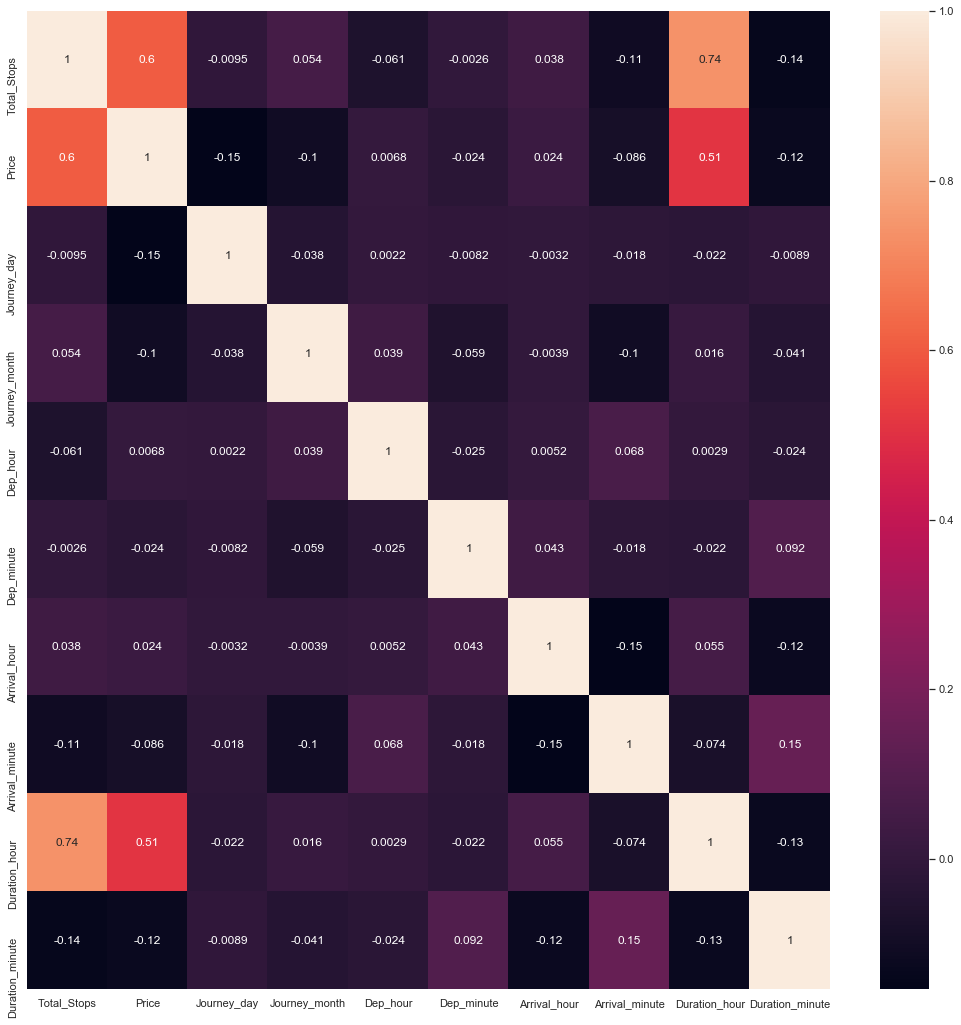

In [230]:
plt.figure(figsize = (18,18))
sns.heatmap(df.corr(), annot = True)

plt.show()

ExtraTreesRegressor gives feature importance

In [231]:
# Importing ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [232]:
print(selection.feature_importances_)


[2.15079267e-01 1.44387194e-01 5.29720889e-02 2.39617364e-02
 2.14464014e-02 2.75610647e-02 1.94194857e-02 1.30477987e-01
 1.75743945e-02 1.05146824e-02 1.55523761e-03 1.79562141e-02
 1.42620229e-01 6.73898431e-02 1.97715383e-02 8.64341335e-04
 2.76705547e-03 9.72634926e-05 5.04211682e-03 8.33746144e-05
 5.32864637e-04 9.75058081e-03 3.33290568e-03 6.25051952e-03
 1.20807862e-02 1.52325963e-02 5.70462435e-03 5.63293620e-04
 2.50103130e-02]


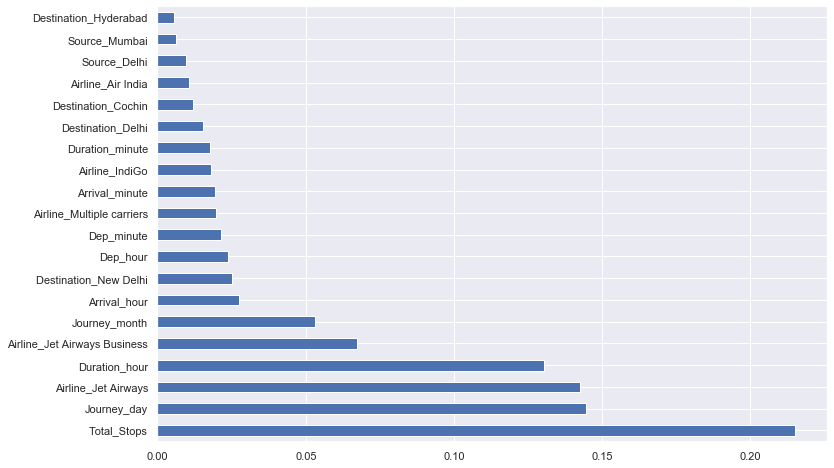

In [233]:
#plotting graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

###### Split dataset into train and test set in order to prediction w.r.t X_test

1. If needed do scaling of data
2. Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check RSME Score
7. Plot graph

In [263]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [264]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [265]:
y_pred = rf.predict(X_test)

In [259]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

In [282]:
rf.score(X_train, y_train)

0.9523975360863131

In [267]:
rf.score(X_test, y_test)

0.798181489315205

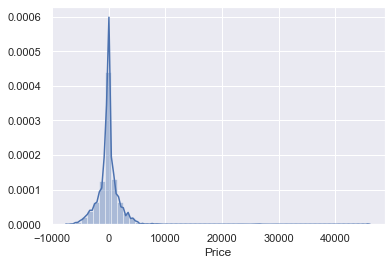

In [268]:
sns.distplot(y_test-y_pred)
plt.show()

In [ ]:
# gaussean curve means results are correct

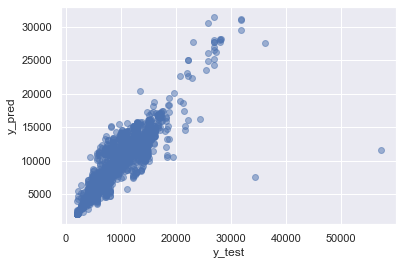

In [269]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

##### METRICS: EXPLAINNNEW26$%%

In [270]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1177.5386294553207
MSE: 4351622.094643996
RMSE: 2086.054192643134


In [271]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [275]:
metrics.r2_score(y_test, y_pred)


0.798181489315205

### Hyperparameter Tuning

In [274]:
from sklearn.model_selection import RandomizedSearchCV

In [276]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [277]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [278]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [279]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   7.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   7.7s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.1s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.4s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 10.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [280]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [289]:
prediction = rf_random.predict(X_test)

In [283]:
# from sklearn.metrics import accuracy_score
# rf_random.score(y_test, prediction)
# accuracy = accuracy_score(y_test, prediction)

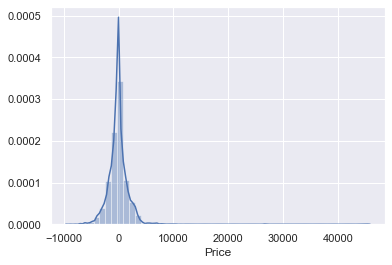

In [290]:
sns.distplot(y_test-prediction)
plt.show()

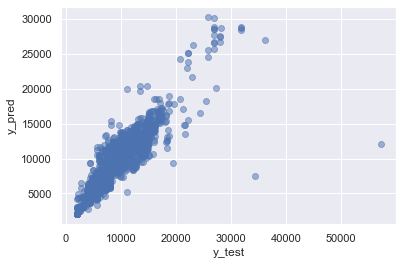

In [291]:
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [286]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1163.0725740051485
MSE: 4050101.5124644153
RMSE: 2012.486400566328


### Saving the model to reuse

In [295]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [296]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [297]:
y_prediction = forest.predict(X_test)

In [298]:
metrics.r2_score(y_test, y_prediction)

0.8121653402822255